In [1]:
from config_plots import plt,animation,plot_sets,px2inch,get_filename
from   scipy.integrate import solve_ivp as ode45
import numpy as np

%matplotlib widget

In [2]:

def f(x):
    return 1/4 * x**4 - 1/2*x**2

def dfdt(t,y,b):

    return np.array([ [ y[1]               ],
                      [ y[0]-y[0]**3-b*y[1]], ]).flatten()


In [3]:
nframes = 600

# time vector
tf   = 50
t    = np.linspace(0,tf,nframes)

# x vector for P(X)
lim  = 1.85
x    = np.linspace(-lim,lim,nframes)


# initial conditions 1
b1   = 0                 # damping
y01  = np.array([-1.701, # x0
                  0.0])  # v0

b2   = 0.1               # damping
y02  = np.array([-1.701, # x0
                 0.0])   # v0

# # initial conditions 2
# b1   = 0                 # damping
# y01  = np.array([0,      # x0
#                  0.25])  # v0

# b2   = 0.1               # damping
# y02  = np.array([0,      # x0
#                  0.25])  # v0


# # initial conditions 3
# b1   = 0                 # damping
# y01  = np.array([1,      # x0
#                  1.5])   # v0

# b2   = 0.1               # damping
# y02  = np.array([1,      # x0
#                  1.5])   # v0


# Eval potential function 
P = f(x)

def get_data(y0,b):

        # Phase Space, compute vector field Sx,Sy,Su,Sv
        N_arrows = 20
        klim     = 0.1
        sxy      = np.linspace(-lim+klim,lim-klim,N_arrows)
        Sx,Sy    = np.meshgrid(sxy,sxy)
        Y        = np.zeros((2,N_arrows **2))

        for i,(sx,sy) in enumerate( zip(Sx.flatten(),Sy.flatten()) ):
                y      = np.array([sx,sy])
                Y[:,i] = dfdt(t,y,b)

        Y  = Y / np.sqrt( np.sum(Y**2,axis=0) )
        Su = Y[0,:].reshape((N_arrows,N_arrows))
        Sv = Y[1,:].reshape((N_arrows,N_arrows))

        # Integrate the dfdt(t,y)
        sol   = ode45(dfdt,(0,tf),y0,t_eval=t,args=(b,))
        phase = sol.y
        px = phase[0,:]
        py = phase[1,:]

        return Sx,Sy,Su,Sv,px,py

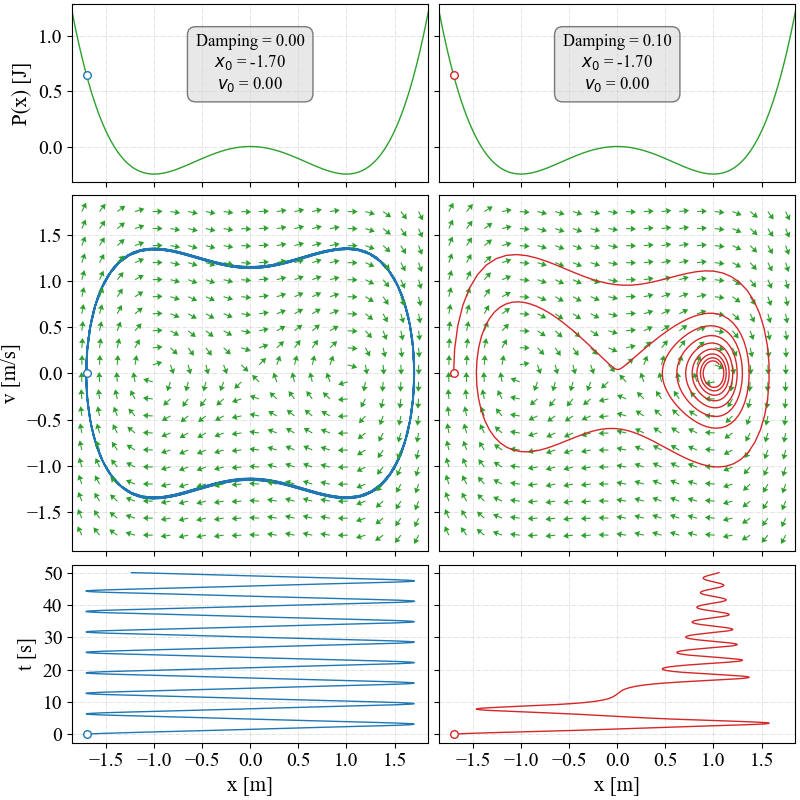

In [4]:
size      = 800
size_fig  = (size*px2inch,size*px2inch) 
fig, ax   = plt.subplot_mosaic([[0,0,3,3],
                                   [1,1,4,4],
                                   [1,1,4,4],
                                   [2,2,5,5]],
                                   layout='constrained',figsize=size_fig,sharex=True)

txt_box     = dict(boxstyle='round',facecolor='lightgray', alpha=0.5,edgecolor='k',pad=0.5)
c_potencial = 'tab:green' 
c_lines1    = 'tab:blue' 
c_lines2    = 'tab:red' 
ms          = 30
markers1 = dict(c='w',ec=c_lines1,s=ms)
markers2 = dict(c='w',ec=c_lines2,s=ms)

### 1º Column
### y0 = y01
### b  = b1
#########################################################
Sx1,Sy1,Su1,Sv1,px1,py1 = get_data(y01,b1)

axi=ax[0]
axi.plot(x,P,c_potencial)
s1a = axi.scatter(y01[0],f(y01[0]),zorder=100,**markers1)
txt = f'Damping = {b1:0.2f}\n$x_0$ = {y01[0]:0.2f}\n$v_0$ = {y01[1]:0.2f}'
axi.text(0,0.75,txt,ha='center',va='center',bbox=txt_box)
plot_sets(axi,gr=True,ti='',yla='P(x) [J]',xli=[-lim,lim],ba=0.5)

axi=ax[1]
axi.quiver(Sx1,Sy1,Su1,Sv1,color=c_potencial,zorder=100,headwidth=6)
axi.plot(px1,py1,c_lines1,zorder=50)
s1b=axi.scatter(px1[0],py1[0],zorder=100,**markers1)
plot_sets(axi,gr=True,ti='',yla='v [m/s]',xli=[-lim,lim],ba=1)

axi=ax[2]
axi.plot(px1,t,c=c_lines1)
s1c=axi.scatter(px1[0],t[0],zorder=100,**markers1)
axi.set_yticks(np.arange(0,60,10))
plot_sets(axi,gr=True,ti='',xla='x [m]',yla='t [s]',xli=[-lim,lim],ba=0.5)


### 2º Column
### y0 = y02
### b  = b2
#########################################################
Sx2,Sy2,Su2,Sv2,px2,py2 = get_data(y02,b2)
axi=ax[3]
axi.plot(x,P,c_potencial)
s2a=axi.scatter(y02[0],f(y02[0]),zorder=100,**markers2)
txt = f'Damping = {b2:0.2f}\n$x_0$ = {y02[0]:0.2f}\n$v_0$ = {y02[1]:0.2f}'
axi.text(0,0.75,txt,ha='center',va='center',bbox=txt_box)
plot_sets(axi,gr=True,ti='',xli=[-lim,lim],ba=0.5,ticks_off=3)

axi=ax[4]
axi.quiver(Sx2,Sy2,Su2,Sv2,color=c_potencial,zorder=10,headwidth=6)
axi.plot(px2,py2,c_lines2,zorder=50)
s2b=axi.scatter(px2[0],py2[0],zorder=100,**markers2)
plot_sets(axi,gr=True,ti='',xli=[-lim,lim],ba=1,ticks_off=3)

axi=ax[5]
axi.plot(px2,t,c=c_lines2)
s2c=axi.scatter(px2[0],t[0],zorder=100,**markers2)
axi.set_xticks(np.arange(-1.5,1.75,0.5))
axi.set_yticks(np.arange(0,60,10))
plot_sets(axi,gr=True,ti='',xla='x [m]',xli=[-lim,lim],ba=0.5,ticks_off=3)

plt.show()

save_figure = False
if save_figure:
   filename = get_filename('imgs/img','.pdf')
   plt.savefig(filename, dpi=300)

In [5]:

# Run animation and save
run_animation = False

if run_animation:

    def animate_fun(i):
        
        s1a.set_offsets(( px1[i], f(px1[i]) ))
        s1b.set_offsets(( px1[i],   py1[i]  ))
        s1c.set_offsets(( px1[i],   t[i]    ))
    
        s2a.set_offsets(( px2[i], f(px2[i]) ))
        s2b.set_offsets(( px2[i],   py2[i]  ))
        s2c.set_offsets(( px2[i],   t[i]    ))

    
    ani = animation.FuncAnimation(fig=fig,
                                    func=animate_fun,
                                    frames=nframes)
    
    writer = animation.PillowWriter(fps=20)
    
    filename = get_filename('imgs/animation','.gif')
    ani.save(filename, writer=writer)